In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exercise

For these exercices we are using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/kernels) provided by Airbnb for a Kaggle competition. It describes its offer for New York City in 2019, including types of appartments, price, location etc.

## 1. Create a dataframe 
Create a dataframe of a few lines with objects and their poperties (e.g fruits, their weight and colour).
Calculate the mean of your Dataframe.

In [5]:
fruits = pd.DataFrame({'fruits':['strawberry', 'orange','melon'], 'weight':[20, 200, 1000],'weight2':[20, 200, 1000], 'color': ['red','orange','yellow']})


In [6]:
fruits.describe()

,weight,weight2
count,3.000000,3.000000
mean,406.666667,406.666667
std,521.664004,521.664004
min,20.000000,20.000000
25%,110.000000,110.000000
50%,200.000000,200.000000
75%,600.000000,600.000000
max,1000.000000,1000.000000


In [5]:
fruits.mean()

weight    406.666667
dtype: float64

## 2. Import
- Import the table called ```AB_NYC_2019.csv``` as a dataframe. It is located in the Datasets folder. Have a look at the beginning of the table (head).

- Create a histogram of prices

In [11]:
airbnb = pd.read_csv('Data/AB_NYC_2019.csv')

In [13]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


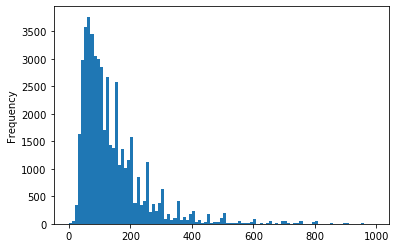

In [17]:
airbnb['price'].plot(kind = 'hist', bins = range(0,1000,10));

## 3. Operations

Create a new column in the dataframe by multiplying the "price" and "availability_365" columns to get an estimate of the maximum yearly income.

In [18]:
airbnb['yearly_income'] = airbnb['price']*airbnb['availability_365']

In [19]:
airbnb['yearly_income']

0        54385
1        79875
2        54750
3        17266
4            0
         ...  
48890      630
48891     1440
48892     3105
48893      110
48894     2070
Name: yearly_income, Length: 48895, dtype: int64

## 3b. Subselection and plotting
Create a new Dataframe by first subselecting yearly incomes between 1 and 100'000 and then by suppressing cases with 0 reviews. Then make a scatter plot of yearly income versus number of reviews 

In [20]:
(airbnb.yearly_income>1)&(airbnb.yearly_income<100000)

0         True
1         True
2         True
3         True
4        False
         ...  
48890     True
48891     True
48892     True
48893     True
48894     True
Name: yearly_income, Length: 48895, dtype: bool

In [21]:
sub_airbnb = airbnb[(airbnb.yearly_income>1)&(airbnb.yearly_income<100000)].copy()

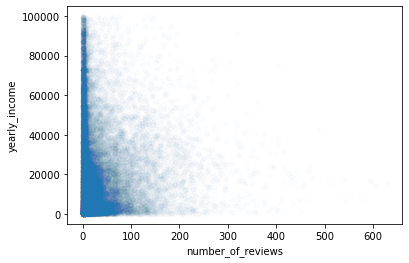

In [22]:
sub_airbnb.plot(x = 'number_of_reviews', y = 'yearly_income', kind = 'scatter', alpha = 0.01)
plt.show()

## 4. Combine

We provide below and additional table that contains the number of inhabitants of each of New York's boroughs ("neighbourhood_group" in the table). Use ```merge``` to add this population information to each element in the original dataframe.

In [23]:
boroughs = pd.read_excel('Data/ny_boroughs.xlsx')

In [24]:
boroughs

,borough,population
0,Brooklyn,2648771
1,Manhattan,1664727
2,Queens,2358582
3,Staten Island,479458
4,Bronx,1471160


In [25]:
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,yearly_income
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,54385
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,79875
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,54750
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,17266
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,630
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,1440
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,3105
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,110


In [26]:
merged = pd.merge(airbnb, boroughs, left_on = 'neighbourhood_group', right_on='borough')

In [27]:
merged.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,yearly_income,borough,population
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,54385,Brooklyn,2648771
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,17266,Brooklyn,2648771
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,0,Brooklyn,2648771
3,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314,27946,Brooklyn,2648771
4,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46,6440,Brooklyn,2648771


## 5. Groups

- Using ```groupby``` calculate the average price for each type of room (room_type) in each neighbourhood_group. What is the average price for an entire home in Brooklyn ?
- Unstack the multi-level Dataframe into a regular Dataframe with ```unstack()``` and create a bar plot with the resulting table


In [28]:
airbnb.groupby(['neighbourhood_group','room_type']).mean()

id       host_id   latitude  \
neighbourhood_group room_type                                                
Bronx               Entire home/apt  2.269787e+07  1.037373e+08  40.848013   
                    Private room     2.235896e+07  1.060786e+08  40.849158   
                    Shared room      2.705442e+07  1.123450e+08  40.840873   
Brooklyn            Entire home/apt  1.730117e+07  4.861704e+07  40.685211   
                    Private room     1.894125e+07  6.242636e+07  40.685513   
                    Shared room      2.358634e+07  1.040423e+08  40.669307   
Manhattan           Entire home/apt  1.866860e+07  6.557697e+07  40.758266   
                    Private room     1.880759e+07  6.982314e+07  40.776002   
                    Shared room      2.115615e+07  9.666720e+07  40.770035   
Queens              Entire home/apt  2.112772e+07  8.713280e+07  40.728993   
                    Private room     2.197231e+07  1.008169e+08  40.732940   
                    Shared room      2.469434e+07  1.123200e+08  40.734411   
Staten Island       Entire home/apt  2.170833e+07  9.618779e+07  40.605728   
                    Private room     2.106201e+07  1.017539e+08  40.614450   
                    Shared room      3.061484e+07  7.713866e+07  40.609894   

                                     longitude       price  minimum_nights  \
neighbourhood_group room_type                                                
Bronx               Entire home/apt -73.880363  127.506596        5.957784   
                    Private room    -73.886172   66.788344        3.858896   
                    Shared room     -73.893407   59.800000        3.366667   
Brooklyn            Entire home/apt -73.955603  178.327545        6.531332   
                    Private room    -73.947150   76.500099        5.539479   
                    Shared room     -73.948156   50.527845        7.753027   
Manhattan           Entire home/apt -73.978402  249.239109       10.539283   
                    Private room    -73.968506  116.776622        5.446880   
                    Shared room     -73.971700   88.977083        6.766667   
Queens              Entire home/apt -73.874459  147.050573        5.369752   
                    Private room    -73.871716   71.762456        5.120107   
                    Shared room     -73.872973   69.020202        4.232323   
Staten Island       Entire home/apt -74.109460  173.846591        6.238636   
                    Private room    -74.103089   62.292553        3.632979   
                    Shared room     -74.091077   57.444444        2.333333   

                                     number_of_reviews  reviews_per_month  \
neighbourhood_group room_type                                               
Bronx               Entire home/apt          30.678100           2.238123   
                    Private room             25.018405           1.641660   
                    Shared room               7.200000           1.351860   
Brooklyn            Entire home/apt          27.945183           1.317630   
                    Private room             21.086952           1.255758   
                    Shared room              14.026634           1.070966   
Manhattan           Entire home/apt          17.815516           1.141610   
                    Private room             26.202706           1.448949   
                    Shared room              21.400000           1.792781   
Queens              Entire home/apt          28.933206           1.967302   
                    Private room             27.746441           1.947959   
                    Shared room              13.863636           1.522895   
Staten Island       Entire home/apt          33.278409           2.074400   
                    Private room             30.159574           1.699182   
                    Shared room               1.555556           1.332000   

                                     calculated_host_listings_count  \
neighbourhoo

In [29]:
summary = airbnb.groupby(['neighbourhood_group','room_type']).mean().price

In [30]:
summary

neighbourhood_group  room_type      
Bronx                Entire home/apt    127.506596
                     Private room        66.788344
                     Shared room         59.800000
Brooklyn             Entire home/apt    178.327545
                     Private room        76.500099
                     Shared room         50.527845
Manhattan            Entire home/apt    249.239109
                     Private room       116.776622
                     Shared room         88.977083
Queens               Entire home/apt    147.050573
                     Private room        71.762456
                     Shared room         69.020202
Staten Island        Entire home/apt    173.846591
                     Private room        62.292553
                     Shared room         57.444444
Name: price, dtype: float64

In [31]:
summary[('Brooklyn','Entire home/apt')]

178.32754472225128

In [32]:
summary.unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


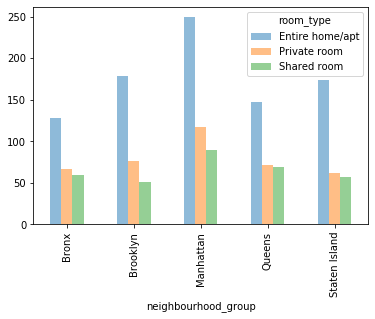

In [33]:
summary.unstack().plot(kind = 'bar', alpha = 0.5)
plt.show()

## 6. Advanced plotting

Using Seaborn, create a scatter plot where x and y positions are longitude and lattitude, the color reflects price and the shape of the marker the borough (neighbourhood_group). Can you recognize parts of new york ? Does the map make sense ?

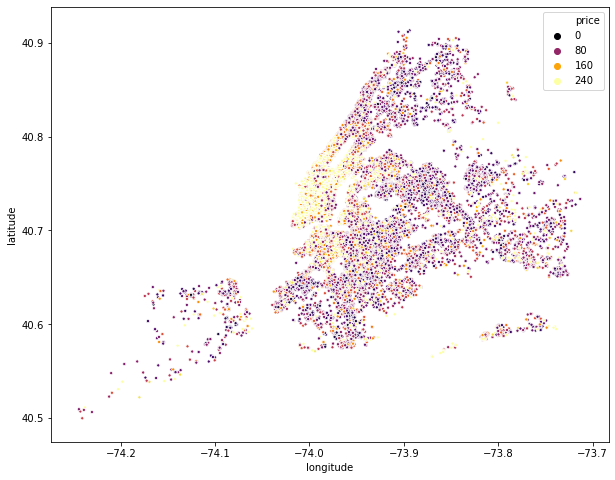

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
g = sns.scatterplot(data = airbnb, y = 'latitude', x = 'longitude', hue = 'price',
                    hue_norm=(0,200), s=10, palette='inferno')